<a href="https://colab.research.google.com/github/ariliasilva/tugas-sains-data/blob/main/Arilia_Silva_Agustin_11119030_3KA18_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program predicts the price of GOOG stock for a   
               specific day 
#              using the Machine Learning algorithm called Support 
               Vector Regression (SVR) 
#              

In [1]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

Shell diatas merupakan import libraries yang akan di gunakan, yaitu librari numpy, pandas,  matplotlib.pyplot. seaborn digunakan untuk background dari grafik yang akan digambarkan. 

```
# Ini diformat sebagai kode
```



In [3]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('uts.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


df merupakan data frame, data frame merupakan tabel/data tabular dengan array dua dimensi yaitu baris dan kolom, df digunakan untuk menyimpan data. 

pd.read.csv = librari pandas akan membaca file dengan ekstensi csv, yang nama file nya uts.csv lalu di simpan dalama data frame. 

In [6]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
18,2021-09-28,2781.77002,2792.129883,2714.0,2723.679932,2723.679932,2109500


Mencetak data terakhir 

In [4]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


menyiapkan data untuk pelatihan. membuatuat ulang grid data dengan mengambil semua data kecuali baris terakhir yang akan saya gunakan untuk menguji model nanti, lalu simpan data baru dengan baris terakhir hilang kembali ke data frame.

In [5]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

Buat variabel yang akan digunakan sebagai kumpulan data independen dan dependen dengan mengaturnya sama dengan daftar kosong.

In [8]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

Mengambil semua baris dari kolom Tanggal lalu disimpan ke dalam variabel yang disebut 'df_days' dan mengambil semua baris dari kolom Adj Close dan simpan datanya ke dalam variabel.

In [10]:
#Create the independent data set
for day in df_days:
   days.append( [int(day.split('-')[2])] )
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

Mwmbuat kumpulan data independen 'X' dan simpan data dalam variabel 'date'.
Buat kumpulan data dependen 'y' dan simpan data dalam variabel 'adj_close_prices'. Keduanya dapat dilakukan dengan menambahkan data ke masing-masing daftar.

In [11]:
print(days)

[[1], [2], [3], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27], [28]]


In [ ]:
menampilkan tanggal

In [18]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=800.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=990.0, degree=4)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=990.0, gamma=0.30)
rbf_svr.fit(days, adj_close_prices)

SVR(C=990.0, gamma=0.3)

Membuat dan mencoba 3 model Support Vector Regression (SVR) yang berbeda dengan tiga kernel berbeda untuk melihat yang berkinerja terbaik.

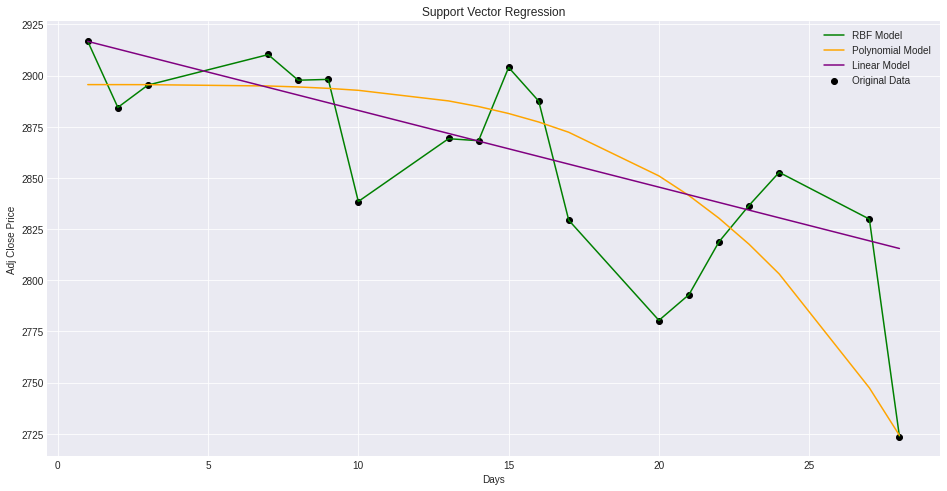

In [19]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Memplot model pada grafik untuk melihat mana yang paling cocok dan mengembalikan prediksi hari itu.

In [20]:
day = [[29]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2718.06297077]
The Linear SVR predicted: [2811.80476585]
The Polynomial SVR predicted: [2698.44099326]


**Kesimpulan**

Pada percobaan yang telah dilakukan model yang paling baik untuk menentukan prediksi pada tanggal 29 September 2021 adalah model RBF, karena terlihat pada grafik model RBF melintasi original data yang ada. 